In [1]:
from tools import *
import pandas as pd
import nltk.data
import numpy as np
from collections import Counter
import nltk
import spacy

import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

warnings.filterwarnings("ignore", category=DeprecationWarning)
sp = spacy.load('en_core_web_sm')
sns.set_style("white")

# Language Shift

### Daily Signal

In [2]:
data = pd.read_csv('data/signal_token.csv')
sent_transform = lambda x: [[j.strip("\'") for j in i.split("', '")] for i in 
                             x.strip('[|]').split("'], ['")]
data['sent_token'] = data['sent_token'].apply(sent_transform)
data['word_token'] = data['word_token'].apply(lambda x: x.strip("[|]|'").split("', '"))

year_range = sorted(set(data['Year']))

In [3]:
year_dist_sig = dict()
for year in year_range:
    cut = data[data['Year']==year]
    dist = nltk.ConditionalFreqDist(((len(w), w) for w in cut['word_token'].sum()))
    year_dist_sig[year] = dist

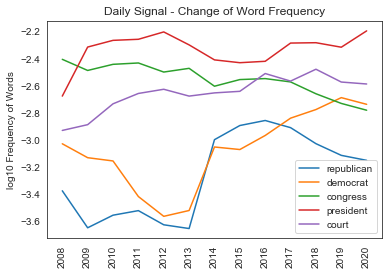

In [4]:
def count(year):
    return sum([sum(year_dist_sig[year][k].values()) for k in year_dist_sig[year]])

total_words = {year:count(year) for year in year_range}

words = ['republican', 'democrat', 'congress', 'president', 'court']
for word in words:
    freq = [year_dist_sig[i][len(word)][word]/total_words[i] for i in year_range]
    sns.lineplot(x = year_range, y=np.log10(freq), label = word)
    
plt.xticks(year_range, rotation='vertical')
plt.grid(False)
plt.ylabel('log10 Frequency of Words')
plt.title('Daily Signal - Change of Word Frequency')
plt.show()

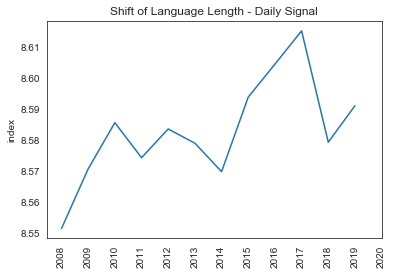

In [5]:
df_stack = pd.DataFrame()
for lg in range(7, 16):
    df_stack[f'len_{lg}'] = [sum(year_dist_sig[i][lg].values()) for i in 
                             range(2008,2020)]
df_stack['total'] = df_stack.sum(axis=1)

for i in df_stack.columns:
    df_stack[i] = df_stack[i]/ df_stack['total'] 
    
df_stack = df_stack.drop('total', axis=1)

for i, ind in enumerate(df_stack.columns):
    df_stack[ind] = (i+7) * df_stack[ind]
df_stack['index'] = df_stack.sum(axis=1)

sns.lineplot(x = range(2008,2020), y = df_stack['index'])
plt.xticks(year_range, rotation='vertical')
plt.title('Shift of Language Length - Daily Signal')
plt.show()

sig = df_stack[['index']].copy()
sig['year'] = range(2008,2020)

### Heritage

In [6]:
data = pd.read_csv('data/heritage_token.csv')
sent_transform = lambda x: [[j.strip("\'") for j in i.split("', '")] for i in 
                             x.strip('[|]').split("'], ['")]
data['sent_token'] = data['sent_token'].apply(sent_transform)
data['word_token'] = data['word_token'].apply(lambda x: x.strip("[|]|'").split("', '"))

In [7]:
year_dist_her = dict()
year_range = range(2000, 2019)

for year in year_range:
    cut = data[data['Year']==year]
    dist = nltk.ConditionalFreqDist(((len(w), w) for w in cut['word_token'].sum()))
    year_dist_her[year] = dist

In [8]:
def count(year):
    return sum([sum(year_dist_her[year][k].values()) for k in year_dist_her[year]])

total_words = {year:count(year) for year in year_range}

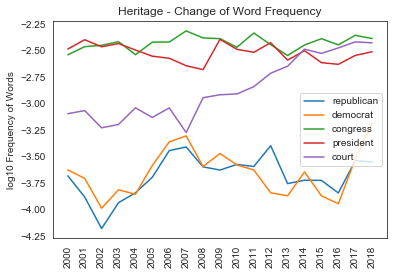

In [9]:
words = ['republican', 'democrat', 'congress', 'president', 'court']
for word in words:
    freq = [year_dist_her[i][len(word)][word]/total_words[i] for i in year_range]
    sns.lineplot(x = year_range, y=np.log10(freq), label = word)
    
plt.xticks(year_range, rotation='vertical')
plt.grid(False)
plt.ylabel('log10 Frequency of Words')
plt.title('Heritage - Change of Word Frequency')
plt.show()

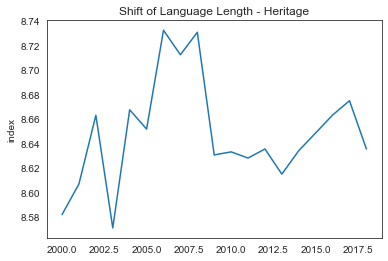

In [10]:
df_stack = pd.DataFrame()
for lg in range(7, 16):
    df_stack[f'len_{lg}'] = [sum(year_dist_her[i][lg].values()) for i in 
                             year_range]
df_stack['total'] = df_stack.sum(axis=1)

for i in df_stack.columns:
    df_stack[i] = df_stack[i]/ df_stack['total'] 
    
df_stack = df_stack.drop('total', axis=1)

for i, ind in enumerate(df_stack.columns):
    df_stack[ind] = (i+7) * df_stack[ind]
df_stack['index'] = df_stack.sum(axis=1)

sns.lineplot(x = year_range, y = df_stack['index'])
#plt.xticks(year_range, rotation='vertical')
plt.title('Shift of Language Length - Heritage')
plt.show()

her = df_stack[['index']].copy()
her['year'] = range(2000, 2019)

### AEI

In [11]:
data = pd.read_csv('data/aei_token.csv')
sent_transform = lambda x: [[j.strip("\'") for j in i.split("', '")] for i in 
                             x.strip('[|]').split("'], ['")]
data['sent_token'] = data['sent_token'].apply(sent_transform)
data['word_token'] = data['word_token'].apply(lambda x: x.strip("[|]|'").split("', '"))

year_dist_aei = dict()
year_range = range(2000, 2019)
for year in year_range:
    cut = data[data['Year']==year]
    dist = nltk.ConditionalFreqDist(((len(w), w) for w in cut['word_token'].sum()))
    year_dist_aei[year] = dist

In [12]:
def count(year):
    return sum([sum(year_dist_aei[year][k].values()) for k in year_dist_aei[year]])

total_words = {year:count(year) for year in year_range}

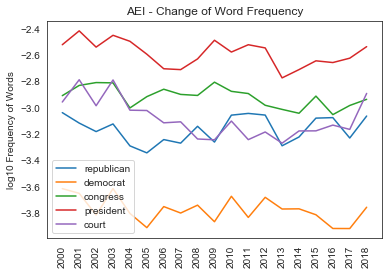

In [13]:
words = ['republican', 'democrat', 'congress', 'president', 'court']
for word in words:
    freq = [year_dist_aei[i][len(word)][word]/total_words[i] for i in year_range]
    sns.lineplot(x = year_range, y=np.log10(freq), label = word)
    
plt.xticks(year_range, rotation='vertical')
plt.grid(False)
plt.ylabel('log10 Frequency of Words')
plt.title('AEI - Change of Word Frequency')
plt.show()

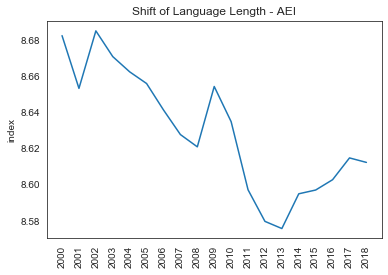

In [14]:
df_stack = pd.DataFrame()
for lg in range(7, 16):
    df_stack[f'len_{lg}'] = [sum(year_dist_aei[i][lg].values()) for i in 
                             year_range]
df_stack['total'] = df_stack.sum(axis=1)

for i in df_stack.columns:
    df_stack[i] = df_stack[i]/ df_stack['total'] 
    
df_stack = df_stack.drop('total', axis=1)

for i, ind in enumerate(df_stack.columns):
    df_stack[ind] = (i+7) * df_stack[ind]
df_stack['index'] = df_stack.sum(axis=1)

sns.lineplot(x = year_range, y = df_stack['index'])
plt.xticks(year_range, rotation='vertical')
plt.title('Shift of Language Length - AEI')
plt.show()

aei = df_stack[['index']].copy()
aei['year'] =  range(2000, 2019)

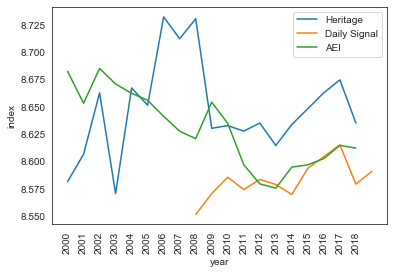

In [15]:
sns.lineplot(y = 'index', x = 'year', data = her, label = 'Heritage')
sns.lineplot(y = 'index', x = 'year', data = sig, label = 'Daily Signal')
sns.lineplot(y = 'index', x = 'year', data = aei, label = 'AEI')
plt.xticks(range(2000, 2019), rotation='vertical')
plt.show()